통계적 추론하기

In [1]:
import numpy as np

x = [0,3,5,7,10]

s = np.std(x)
m = np.mean(x)
z = (7-m)/s

print(z)

0.5872202195147035


In [2]:
from scipy import stats

stats.zscore(x)

array([-1.46805055, -0.58722022,  0.        ,  0.58722022,  1.46805055])

In [3]:
#누적분포 이해하기
stats.norm.cdf(0)

np.float64(0.5)

In [4]:
stats.norm.cdf(2)-stats.norm.cdf(-2)

np.float64(0.9544997361036416)

In [5]:
stats.norm.ppf(0.9)

np.float64(1.2815515655446004)

In [6]:
#중심극한정리
import pandas as pd

ns_book7 =pd.read_csv('ns_book7.csv',low_memory=False)
ns_book7.head()


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


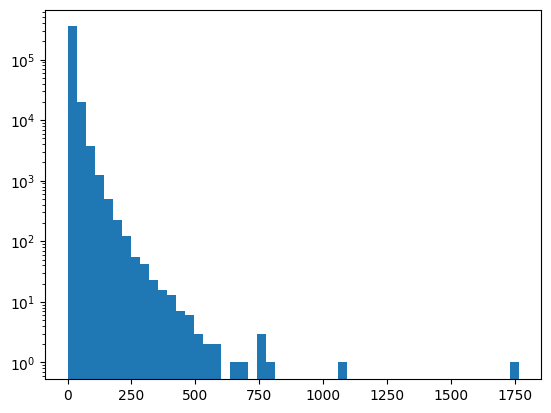

In [7]:
import matplotlib.pyplot as plt

plt.hist(ns_book7['대출건수'], bins=50)
plt.yscale('log')
plt.show()

In [8]:
#샘플링하기
np.random.seed(42)
sample_means = []
for _ in range(1000):
    m = ns_book7['대출건수'].sample(30).mean()
    sample_means.append(m)

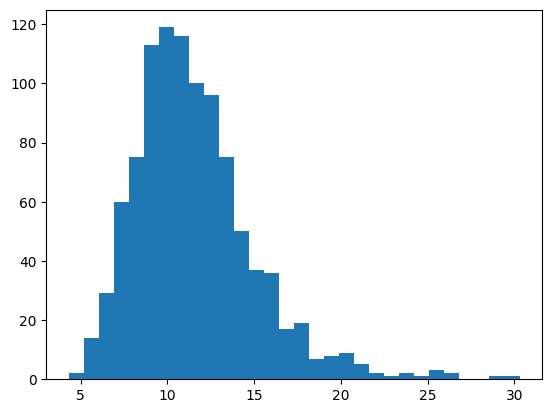

In [9]:
plt.hist(sample_means,bins=30)
plt.show()

In [10]:
np.mean(sample_means)

np.float64(11.539900000000001)

In [11]:
ns_book7['대출건수'].mean()

np.float64(11.593438968070707)

In [12]:
np.random.seed(42)
sample_means = []
for _ in range(1000):
    m = ns_book7['대출건수'].sample(20).mean()
    sample_means.append(m)
np.mean(sample_means)

np.float64(11.39945)

In [13]:
np.random.seed(42)
sample_means = []
for _ in range(1000):
    m = ns_book7['대출건수'].sample(40).mean()
    sample_means.append(m)
np.mean(sample_means)

np.float64(11.5613)

In [14]:
np.std(sample_means)

np.float64(3.0355987564235165)

In [15]:
np.std(ns_book7['대출건수'])/np.sqrt(40)

np.float64(3.048338251806833)

In [16]:
#신뢰구간
python_book_index = ns_book7['주제분류번호'].str.startswith('00')& \
                    ns_book7['도서명'].str.contains('파이썬')
python_books = ns_book7[python_book_index]
python_books.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
1040,1060,실전 알고리즘 트레이딩 배우기 (파이썬으로 시작하는 알고리즘 트레이딩의 기초와 실전...,세바스티앙 도나디오.수라브 고쉬 지음|이기홍,에이콘출판,2021,9791161754901,NaN,NaN,NaN,004.73,1,1,2021-03-09
1162,1185,파이썬으로 경험하는 빅데이터 분석과 머신러닝,"이영호,이수현 지음",생능출판사,2021,9788970504803,NaN,9,NaN,005.135,1,1,2021-03-02
1447,1504,금융 파이썬 쿡북 (금융 데이터 처리와 기술 분석부터 딥러닝 적용까지),에릭 르윈슨,에이콘출판,2021,9791161750507,NaN,NaN,NaN,005.133,1,2,2021-02-22
1563,1630,프로그래머를 위한 파이썬 (실전 프로젝트로 배우는 소프트웨어 개발의 원리와 정석),데인 힐라드 지음|황반석,제이펍,2020,9791190665636,NaN,NaN,NaN,005.133,1,2,2021-02-16
1571,1640,"엑셀 × 파이썬 업무 자동화 - 매크로, VBA는 이제 낡았다!","카네히로 카즈미 (지은이), 서수환 (옮긴이)",인사이트,2020,9788966262847,NaN,NaN,NaN,005.53,1,2,2021-02-16


In [17]:
len(python_books)

251

In [19]:
python_mean=np.mean(python_books['대출건수'])
python_mean

np.float64(14.749003984063744)

In [21]:
python_std = np.std(python_books['대출건수'])
python_se = python_std / np.sqrt(len(python_books))
python_se

np.float64(0.8041612072427442)

In [22]:
stats.norm.ppf(0.975)

np.float64(1.959963984540054)

In [23]:
stats.norm.ppf(0.025)

np.float64(-1.9599639845400545)

In [25]:
print(python_mean-1.96*python_se, python_mean+1.96*python_se)

13.172848017867965 16.325159950259522
